#  Evaluating Clusters

# Ödev 1

İki küme k-ortalama çözümünün siluet katsayısını elde edin. Siluet katsayısının, küme sayısının üç olduğu yukarıdakilerden büyük olacağını göreceksiniz. Iris veri setinin üç farklı kümeden oluştuğunu biliyoruz. Kümelerin sayısının doğru sınıf sayısına eşit olmasıyla çözümün siluet puanının, küme sayısının doğru sınıf sayısından farklı olduğu seviyeden daha düşük olduğunu nasıl açıklarsınız?

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [2]:
# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_yarı1, X_yarı2, X_pcayarı1, X_pcayarı2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

Sonra, alt örnekler için k-ortalama uygularız ve tahminleri elde ederiz. Farklı k değerlerinin sonuçlarını karşılaştırmak için, k'yi 2, 3 ve 4'e alarak, k-ortalama algoritmasını uygularız.

In [3]:
# Data frame to store features and predicted cluster memberships.
ytahmin = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_yarı1, X_pcayarı1),
    (X_yarı2, X_pcayarı2)]):
    
    # Put the features into ypred.
    ytahmin['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ytahmin['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        tahmin = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ytahmin['clust' + str(nclust) + '_sample' + str(counter)] = tahmin

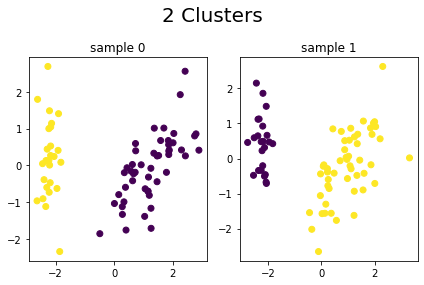

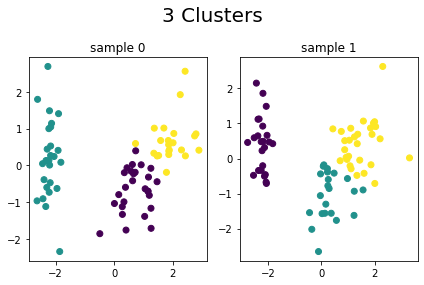

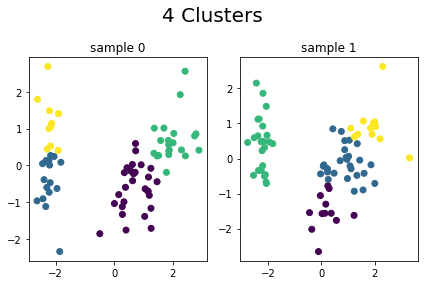

In [4]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ytahmin['pca_f1_sample{}'.format(i)]
        y_sub = ytahmin['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ytahmin['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [5]:
tam_tahmin2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
tam_tahmin2 = np.array([0 if x == 1 else 1 if x==0 else 2 for x in tam_tahmin2])
metrics.adjusted_rand_score(y, tam_tahmin2)

0.5681159420289855

In [6]:
etiketler2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, etiketler2, metric='euclidean'))

0.5817500491982808


In [7]:
tam_tahmin3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
tam_tahmin3 = np.array([0 if x == 1 else 1 if x==0 else 2 for x in tam_tahmin3])
metrics.adjusted_rand_score(y, tam_tahmin3)

0.6201351808870379

In [8]:
etiketler3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, etiketler3, metric='euclidean'))

0.45994823920518635


In [9]:
tam_tahmin4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)
tam_tahmin4 = np.array([0 if x == 1 else 1 if x==0 else 2 for x in tam_tahmin4])
metrics.adjusted_rand_score(y, tam_tahmin4)

0.2505896502710048

In [10]:
etiketler4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, etiketler4, metric='euclidean'))

0.3882200962165986


# Ödev 2

Bu ödevde, UC Irvine Machine Learning Repository den elde edilecek kalp hastalığı verisi kullanılacaktır.

Veri seti kümeleme algoritmasına geçmeden önce bazı ön işlemlere ihtiyaç duymaktadır.

#Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

#Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

#Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)
Burada, X sizin özellikleriniz olacak ve y içinde etiketleri tutuyoruz. Y, 1'e eşitse, o zaman buna karşılık gelen hastanın kalp hastalığı olduğunu ve y'nin 0'a eşit olması durumunda, hastanın kalp hastalığı olmadığı anlaşılacaktır.

Verileri rastgele ikiye bölün ve bu bölümdeki tutarlılık tartışmamızda yaptığımız gibi, küme sayısı olarak iki, üç ve dört kullanarak k-ortalama uygulayın. Görselleştirmeyi kullanarak çözümlerin tutarlılığını değerlendirin. Hangisi en iyisi gibi görünüyor?

K veri setini tüm veri kümelerine k, iki, üç ve dört eşit olacak şekilde uygulayın ve her biri için ARI puanı alın. Hangi model en iyisidir?
K veri setini tüm veri kümelerine k, iki, üç ve dört eşit olacak şekilde uygulayın ve her biri için siluet katsayısı elde edin. Hangi model en iyisidir?

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

heartdisease_df = pd.read_csv('cleveland-0_vs_4.csv')

In [12]:
for i in ["ca", "thal", "num"]:
    print(f"{i} Column values:\n {heartdisease_df[i].unique()}\n")

ca Column values:
 ['0.0' '2.0' '1.0' '3.0' '<null>']

thal Column values:
 ['6.0' '3.0' '7.0' '<null>']

num Column values:
 ['negative' 'positive']



In [13]:
# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
heartdisease_df.num = heartdisease_df.num.replace('negative', 0)
heartdisease_df.num = heartdisease_df.num.replace('positive', 1)

In [14]:
print(heartdisease_df.loc[heartdisease_df['ca'] == '<null>'])
print(heartdisease_df.loc[heartdisease_df['thal'] == '<null>'])

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
85   52.0  1.0  3.0     138.0  223.0  0.0      0.0    169.0    0.0      0.0   
142  58.0  1.0  2.0     125.0  220.0  0.0      0.0    144.0    0.0      0.4   
146  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope      ca thal  num  
85     1.0  <null>  3.0    0  
142    2.0  <null>  7.0    0  
146    1.0  <null>  3.0    0  
     age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
44  53.0  0.0  3.0     128.0  216.0  0.0      2.0    115.0    0.0      0.0   

    slope   ca    thal  num  
44    1.0  0.0  <null>    0  


In [15]:
heartdisease_df = heartdisease_df.drop([44,85,142,146])

In [16]:
heartdisease_df = heartdisease_df.dropna()
heartdisease_df.drop(heartdisease_df.tail(1).index,inplace=True)

In [17]:
heartdisease_df = heartdisease_df.reset_index(drop=True)

In [18]:
heartdisease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       172 non-null    float64
 1   sex       172 non-null    float64
 2   cp        172 non-null    float64
 3   trestbps  172 non-null    float64
 4   chol      172 non-null    float64
 5   fbs       172 non-null    float64
 6   restecg   172 non-null    float64
 7   thalach   172 non-null    float64
 8   exang     172 non-null    float64
 9   oldpeak   172 non-null    float64
 10  slope     172 non-null    float64
 11  ca        172 non-null    object 
 12  thal      172 non-null    object 
 13  num       172 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 18.9+ KB


In [19]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [21]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_yarı1, X_yarı2, X_pcayarı1, X_pcayarı2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [22]:
# Data frame to store features and predicted cluster memberships.
ytahmin2 = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_yarı1, X_pcayarı1),
    (X_yarı2, X_pcayarı2)]):
    
    # Put the features into ypred.
    ytahmin2['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ytahmin2['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        tahmin = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ytahmin2['clust' + str(nclust) + '_sample' + str(counter)] = tahmin

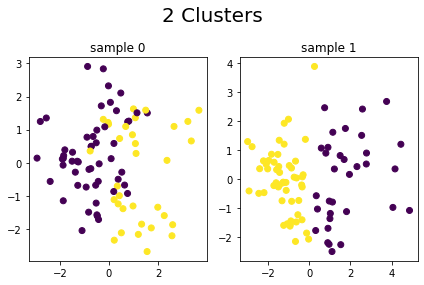

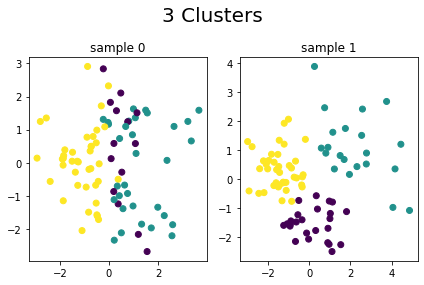

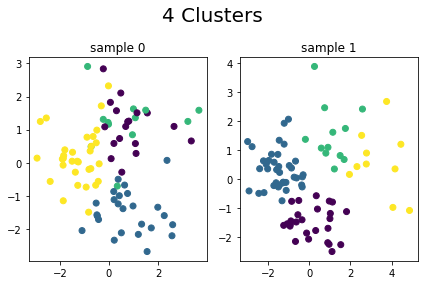

In [23]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ytahmin2['pca_f1_sample{}'.format(i)]
        y_sub = ytahmin2['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ytahmin2['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')